This notebook searches for the best parameters for the non-parametric density-based DBSCAN clustering algorithm.

In [5]:
import sys
import time
import numpy as np
import pandas as pd
sys.path.append('../')
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from functions.clustering import silhouette_scorer

In [16]:
# read data
data = pd.read_pickle('../data/clustering_input/clustering_df_daily_clean.pkl')

In [17]:
# prepare data for clustering (store and then remove id)
user_id = data['id']
dates = data['date']
data.drop(columns=['id', 'date'], inplace=True)

In [18]:
# min_samples parameter
min_samples = [20, 30, 40]
print("Performing search for min_samples ... ")
start = time.time()
results = []
for min_sample in min_samples:
    print("for parameter:", min_sample)
    model = DBSCAN(eps=0.5, min_samples=min_sample)  # default eps
    score = silhouette_scorer(model, data)
    results.append((min_sample, score))
print("finished after", time.time() - start)

best_params, best_score = max(results, key=lambda x: x[1])
print("Best parameter value:", best_params)
print("Best silhouette score:", best_score)

Performing search for min_samples ... 
for parameter: 20
for parameter: 30
for parameter: 40
finished after 15.250878810882568
Best parameter value: 30
Best silhouette score: 0.22262291070949014


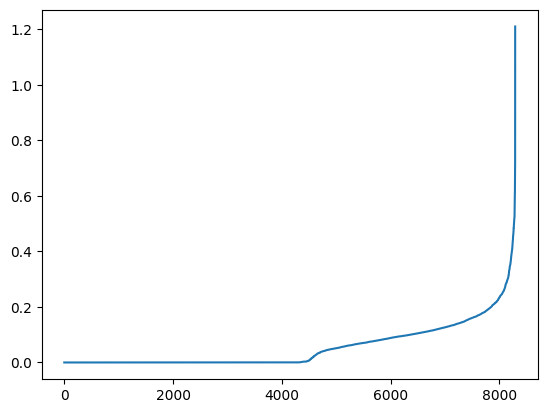

In [19]:
# eps parameter

# calculate the average distance between each point in the dataset and its min_samples nearest neighbors
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
# visualize the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

In [20]:
# eps hyperparameter search
eps = [0.15, 0.2, 0.25, 0.3]
print("Performing search for eps ... ")
start = time.time()
results = []
for ep in eps:
    print("for parameter:", ep)
    model = DBSCAN(eps=ep, min_samples=30)
    score = silhouette_scorer(model, data)
    results.append((ep, score))
print("finished after", time.time() - start)

best_params, best_score = max(results, key=lambda x: x[1])
print("Best parameter value:", best_params)
print("Best silhouette score:", best_score)

Performing search for eps ... 
for parameter: 0.15
for parameter: 0.2
for parameter: 0.25
for parameter: 0.3
finished after 15.536440134048462
Best parameter value: 0.3
Best silhouette score: 0.27024400181463043
